<a href="https://colab.research.google.com/github/fabriciosantana/nlp/blob/main/AKCIT_NLP_M11_Colab_Unidade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

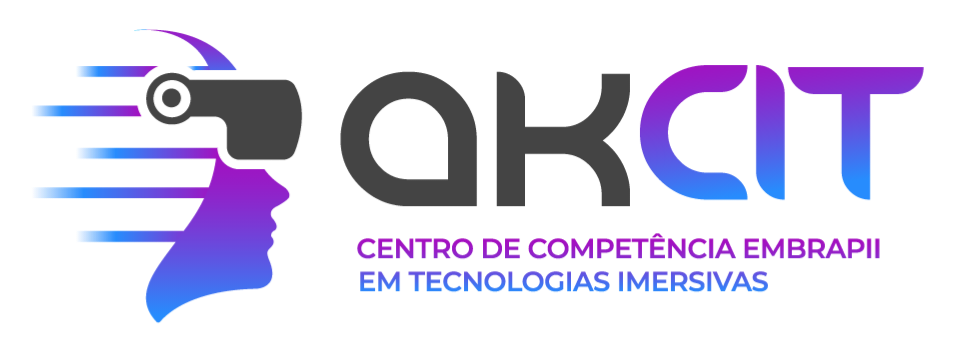

# Identificação

**Microcurso:** Aplicações Emergentes e Imersivas de Modelos de Linguagem

**Docente:** Prof. Dr. Frederico Santos de Oliveira

# Objetivos de Aprendizagem

- Apresentar uma demonstração prática do uso do modelo LLaVA: Introduzir aos alunos as funcionalidades e capacidades do LLaVA por meio de exemplos concretos e interativos, facilitando a compreensão de seu funcionamento e aplicação.

- Exibir diferentes casos de uso: Demonstrar a versatilidade do modelo LLaVA ao apresentar uma variedade de cenários e aplicações práticas, destacando como ele pode ser implementado em diferentes contextos e setores.

- Avaliar os resultados das respostas geradas: Analisar a qualidade e a precisão das respostas fornecidas pelo modelo LLaVA, identificando pontos fortes e oportunidades de melhoria para otimizar seu desempenho em aplicações reais.



# Tópico "Aplicação de LLMs em Contexto Multimodal"


O LLaVA (*Large Language and Vision Assistant*) é um modelo multimodal projetado para interpretar e responder a comandos que envolvem texto e imagens. Integrando o codificador visual CLIP ViT-L/14 e o modelo de linguagem Vicuna, ele oferece uma compreensão detalhada de contextos visuais e linguísticos, sendo capaz de descrever imagens, responder perguntas sobre conteúdo visual e seguir instruções complexas.

Sua inovação central está no uso de dados de instruções multimodais gerados pelo GPT-4, que aprimoram sua capacidade de alinhar informações visuais e textuais. O LLaVA é disponibilizado como *open-source*, incentivando a pesquisa em agentes multimodais, e é aplicável em áreas como educação, medicina e atendimento ao cliente, proporcionando uma interação mais natural e contextualizada entre humanos e máquinas.

Nesta atividade prática, vamos avaliar o uso do LLM multimodal LLAva. Para começar, após conectar em uma instância gratuita do Google Colab com Tesla T4, você pode ou clicar individualmente em cada célula para execução, ou, no menu principal, clicar em "Ambiente de Execução" e depois em "Executar Tudo".

Divirta-se! 😊


# Preparação do Ambiente

Nesta etapa, vamos instalar todos os requisitos e preparar o ambiente para utilização do modelo LLaVa. Basta executar a célula a seguir:

In [ ]:
# Atualiza e instala os pacotes necessários para otimização e compatibilidade com modelos quantizados
!pip install --upgrade -q accelerate bitsandbytes

# Instala a versão mais recente da biblioteca Transformers diretamente do repositório do Hugging Face
!pip install git+https://github.com/huggingface/transformers.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.0 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/tra

# Carregamento do Modelo

O próximo passo é carregar o modelo. No trecho de código a seguir realiza-se a configuração e carregamento do LLM LLaVa, utilizando a biblioteca *transformers* da Hugging Face e algumas otimizações específicas para economizar memória e acelerar o processamento com quantização (técnicas de ajustes para melhor aproveitamento de memória, aumento de velocidade e melhoria da eficiência no processamento).

In [ ]:
# Importa as classes necessárias da biblioteca Transformers
from transformers import AutoProcessor, LlavaForConditionalGeneration
from transformers import BitsAndBytesConfig
import torch  # Biblioteca para computação com tensores, utilizada no deep learning

# Configuração para quantização do modelo usando bitsandbytes
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Carrega o modelo em 4 bits para reduzir o uso de memória
    bnb_4bit_compute_dtype=torch.float16  # Define a precisão do cálculo como float16 para balancear desempenho e consumo de memória
)

# Identificador do modelo a ser carregado da Hugging Face
model_id = "llava-hf/llava-1.5-7b-hf"

# Carrega o processador responsável pelo pré-processamento de entradas (tokenização, normalização, etc.)
processor = AutoProcessor.from_pretrained(model_id)

# Carrega o modelo LLaVA (Large Language and Vision Assistant) com a configuração de quantização definida anteriormente
# O parâmetro `device_map="auto"` permite que o modelo seja carregado automaticamente na GPU, se disponível
model = LlavaForConditionalGeneration.from_pretrained(model_id, quantization_config=quantization_config, device_map="auto")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

# Informações Artísticas

Feito o carregamento do modelo para memória, vamos avaliar o modelo LLaVA. Para tal, iremos baixar duas pinturas famosas da web a fim de testar nosso modelo sobre o quão bem ele se sai em relação à informações artísticas.

O trecho de código a seguir realiza o *download* e exibição de imagens da web utilizando as bibliotecas requests e PIL (*Python Imaging Library*).

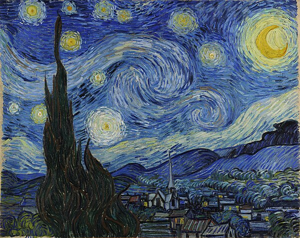

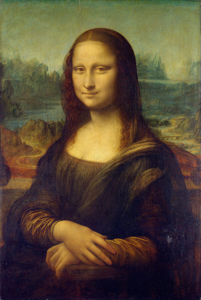

In [ ]:
# Importa a biblioteca requests para fazer requisições HTTP
import requests
# Importa a classe Image da biblioteca Pillow (PIL) para manipulação de imagens
from PIL import Image

# Define o novo tamanho para redimensionamento das imagens (300x300 pixels)
new_size = (300, 300)

# Baixa a primeira imagem da URL usando requests e carrega no formato PIL
image1 = Image.open(requests.get(
    "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/600px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg",
    stream=True).raw)

# Redimensiona a imagem mantendo a proporção, ajustando para o tamanho máximo definido
image1.thumbnail(new_size)

# Exibe a primeira imagem
display(image1)

# Baixa a segunda imagem da URL usando requests e carrega no formato PIL
image2 = Image.open(requests.get(
    "https://cdn.pariscityvision.com/library/image/5449.jpg",
    stream=True).raw)

# Redimensiona a segunda imagem mantendo a proporção
image2.thumbnail(new_size)

# Exibe a segunda imagem
display(image2)


Em seguida, vamos criar um *prompt*, solicitando ao modelo que descreva as pinturas, fornecendo detalhes artísticos:

*Descreva esta famosa obra de arte em detalhes. Explique os principais elementos e símbolos presentes, e discuta as técnicas utilizadas pelo artista que tornam esta peça tão icônica. Descreva as emoções transmitidas pela obra e como as cores, a composição e a iluminação contribuem para o seu clima geral. Além disso, forneça um contexto histórico sobre o artista e o período em que esta peça foi criada. Ofereça uma interpretação do que o artista pode ter pretendido expressar através desta obra.*

O texto acima foi traduzido para o idioma inglês e foi inserido em *prompt* no código abaixo:

*Describe this famous artwork in detail. Explain Explain the main elements and symbols present, and discuss the techniques used by the artist that make this piece so iconic. Describe the emotions conveyed by the artwork and how the colors, composition, and lighting contribute to its overall mood. Also, provide some historical context about the artist and the time period in which this piece was created. Offer an interpretation of what the artist might have intended to express through this work.*

In [ ]:
# Define uma lista de prompts para descrever as imagens fornecidas
prompts = [
    # Prompt para a primeira imagem, pedindo uma análise detalhada da obra de arte
    "USER: <image>\nDescribe this famous artwork in detail. Explain the main elements and symbols present, "
    "and discuss the techniques used by the artist that make this piece so iconic. Describe the emotions conveyed "
    "by the artwork and how the colors, composition, and lighting contribute to its overall mood. Also, provide some "
    "historical context about the artist and the time period in which this piece was created. Offer an interpretation "
    "of what the artist might have intended to express through this work.\nASSISTANT:",

    # Mesmo prompt repetido para a segunda imagem
    "USER: <image>\nDescribe this famous artwork in detail. Explain the main elements and symbols present, "
    "and discuss the techniques used by the artist that make this piece so iconic. Describe the emotions conveyed "
    "by the artwork and how the colors, composition, and lighting contribute to its overall mood. Also, provide some "
    "historical context about the artist and the time period in which this piece was created. Offer an interpretation "
    "of what the artist might have intended to express through this work.\nASSISTANT:",
]

# Processa as imagens junto com os prompts para gerar os tensores de entrada do modelo
inputs = processor(
    [image1, image2],  # Lista de imagens a serem analisadas
    text=prompts,      # Lista de prompts correspondentes às imagens
    padding=True,      # Adiciona padding para padronizar os tamanhos das entradas
    return_tensors="pt" # Retorna os dados no formato de tensores do PyTorch
).to("cuda")  # Move os tensores para a GPU para acelerar a inferência


O próximo passo é fornecer os *prompts* (texto e imagens) ao modelo, e obter os resultados.

In [ ]:
# Gera a resposta do modelo com base nas entradas processadas (imagens e prompts)
output = model.generate(**inputs, max_new_tokens=100)

# Decodifica a saída gerada pelo modelo, convertendo os tensores de volta para texto legível
# O parâmetro `skip_special_tokens=True` remove tokens especiais como "<pad>" e "<eos>"
generated_text = processor.batch_decode(output, skip_special_tokens=True)

# Percorre cada texto gerado e exibe apenas a parte após "ASSISTANT:"
for text in generated_text:
    print(text.split("ASSISTANT:")[-1])  # Remove qualquer conteúdo antes de "ASSISTANT:" e imprime a resposta final


 The famous artwork is "The Starry Night" by Vincent van Gogh, painted in 1886. The painting features a night scene with a sky full of stars, a moon, and a church steeple in the background. The scene is set in a village, with a mountain visible in the distance.

The main elements and symbols present in the painting include the night sky, the moon, the church steeple, and the village. The colors,
 The famous artwork in question is Leonardo da Vinci's "Mona Lisa." The painting features a woman with a mysterious smile, wearing a black veil and a white dress. She is seated in a chair, and the background consists of a landscape with a body of water.

The main elements and symbols present in the painting include the enigmatic smile of the woman, which has been interpreted in various ways, such as a representation of the artist'


## Resultados

Como utilizamos o prompt em inglês, traduzindo para o português a saída para cada imagem temos:

**Imagem 1**:
*A famosa obra de arte é "A Noite Estrelada" de Vincent van Gogh, pintada em 1886. A pintura apresenta uma cena noturna com um céu cheio de estrelas, uma lua e uma torre de igreja ao fundo. A cena se passa em uma vila, com uma montanha visível ao longe.*

**Imagem 2**:
*Os principais elementos e símbolos presentes na pintura incluem o céu noturno, a lua, a torre da igreja e a vila. As cores... A obra de arte famosa em questão é a "Mona Lisa" de Leonardo da Vinci. A pintura retrata uma mulher com um sorriso misterioso, usando um véu preto e um vestido branco. Ela está sentada em uma cadeira, e o fundo consiste em uma paisagem com um corpo d'água.*


# Clima e Tempo

Vamos fornecer ao modelo imagens com diferentes exemplos de clima e tempo, e avaliar as respostas do modelo. Para tal, realizaremos o download das imagens da web, a primeira da bandnews e a seguda da agência de notícias conforme código à seguir.

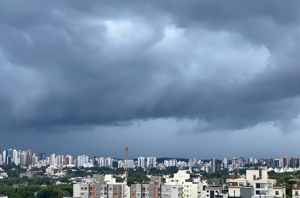

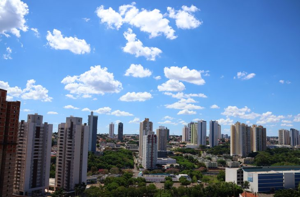

In [ ]:
import requests  # Biblioteca para fazer requisições HTTP e baixar as imagens
from PIL import Image  # Biblioteca para manipulação de imagens

# Define o novo tamanho para as imagens (300x300 pixels)
new_size = (300, 300)

# Baixa a primeira imagem da URL e a abre diretamente com o PIL
image1 = Image.open(
    requests.get("https://cdn.bandnewsfmcuritiba.com/band/wp-content/uploads/2023/02/ceu-nublado-Curitiba-850x560.jpg", stream=True).raw
)

# Redimensiona a imagem mantendo a proporção dentro do limite definido
image1.thumbnail(new_size)

# Exibe a primeira imagem processada
display(image1)

# Baixa a segunda imagem da URL e a abre diretamente com o PIL
image2 = Image.open(
    requests.get("https://agenciadenoticias.ms.gov.br/wp-content/uploads/2023/04/Tempo-de-sol-Foto-%C3%81lvaro-Rezende3-730x480.jpg", stream=True).raw
)

# Redimensiona a segunda imagem mantendo a proporção dentro do limite definido
image2.thumbnail(new_size)

# Exibe a segunda imagem processada
display(image2)


Vamos criar um *prompt* solicitando quais atividades são adequadas dadas as condições climáticas das imagens:

*Observe o clima nesta imagem e sugira atividades adequadas para essas condições. Considere fatores como temperatura, luz solar ou chuva, vento e quaisquer outros elementos visíveis que possam influenciar atividades ao ar livre ou de lazer. Além disso, explique por que essas atividades são apropriadas para o clima observado.*

O texto acima foi traduzido para o idioma inglês e foi inserido em *prompt* no código abaixo:

*Observe the weather in this image and suggest suitable activities for these conditions. Consider factors such as temperature, sunlight or rain, wind, and any other visible elements that may influence outdoor or leisure activities. Also, explain why these activities are appropriate for the observed weather.*


In [ ]:
# Lista de prompts que serão usados como entrada para o modelo
# Cada prompt solicita uma análise do clima presente na imagem e sugere atividades adequadas para as condições meteorológicas observadas
prompts = [
    "USER: <image>\nObserve the weather in this image and suggest suitable activities for these conditions. "
    "Consider factors such as temperature, sunlight or rain, wind, and any other visible elements that may influence "
    "outdoor or leisure activities. Also, explain why these activities are appropriate for the observed weather.\nASSISTANT:",

    "USER: <image>\nObserve the weather in this image and suggest suitable activities for these conditions. "
    "Consider factors such as temperature, sunlight or rain, wind, and any other visible elements that may influence "
    "outdoor or leisure activities. Also, explain why these activities are appropriate for the observed weather.\nASSISTANT:",
]

# Processa as imagens junto com os prompts para prepará-los como entrada para o modelo
# O parâmetro `padding=True` garante que as entradas tenham o mesmo tamanho
# `return_tensors="pt"` converte os dados para tensores PyTorch
# `.to("cuda")` move os tensores para a GPU para acelerar o processamento
inputs = processor([image1, image2], text=prompts, padding=True, return_tensors="pt").to("cuda")


Vamos aumentar o número máximo de tokens para 300, assim podemos receber mais informações sobre as imagens. Verifique no trecho de código abaixo.

In [ ]:
# Gera uma resposta do modelo com base nas imagens e nos prompts fornecidos
# `max_new_tokens=300` define um limite máximo de 300 novos tokens gerados na resposta
output = model.generate(**inputs, max_new_tokens=300)

# Decodifica a saída do modelo, convertendo os tokens gerados de volta para texto legível
# `skip_special_tokens=True` remove tokens especiais que não fazem parte da resposta final
generated_text = processor.batch_decode(output, skip_special_tokens=True)

# Percorre cada resposta gerada pelo modelo
for text in generated_text:
    # Divide o texto na parte que vem após "ASSISTANT:", garantindo que apenas a resposta seja exibida
    print(text.split("ASSISTANT:")[-1])


 The weather in the image appears to be cloudy and potentially rainy, with a large cloud looming over the city. This suggests that the temperature is likely to be cooler, and there might be a chance of rain.

Suitable activities for these conditions could include:
1. Indoor activities: Visiting museums, art galleries, or indoor shopping centers would be a good option for people who want to stay dry and comfortable.
2. Outdoor activities: If the rain does not start, outdoor activities like walking or jogging in the park could be enjoyable. However, if the rain starts, it would be better to seek shelter or postpone outdoor activities until the rain stops.
3. Rainy day activities: If the rain starts, people could engage in activities like reading a book, watching movies, or playing board games to stay indoors and dry.

These activities are appropriate for the observed weather because they allow people to stay dry and comfortable while enjoying their leisure time. The cloudy weather might 

## Resultados

Como utilizamos o *prompt* em inglês, traduzindo para o português a saída para cada imagem temos:

**Imagem 1:**

*O clima na imagem parece estar nublado e potencialmente chuvoso, com uma grande nuvem pairando sobre a cidade. Isso sugere que a temperatura provavelmente está mais fresca, e pode haver uma chance de chuva.*

*Atividades adequadas para essas condições podem incluir:*

- *Atividades em ambientes fechados: Visitar museus, galerias de arte ou centros comerciais seria uma boa opção para quem deseja se manter seco e confortável.*
- *Atividades ao ar livre: Se a chuva não começar, atividades ao ar livre como caminhada ou corrida no parque podem ser agradáveis. No entanto, caso a chuva comece, seria melhor procurar abrigo ou adiar as atividades ao ar livre até que a chuva pare.*
- *Atividades para dias chuvosos: Caso comece a chover, as pessoas poderiam se dedicar a atividades como ler um livro, assistir a filmes ou jogar jogos de tabuleiro, mantendo-se em locais cobertos e secos.*

*Essas atividades são apropriadas para o clima observado, pois permitem que as pessoas fiquem secas e confortáveis enquanto aproveitam seu tempo de lazer. O clima nublado também pode proporcionar uma atmosfera mais relaxante e tranquila, o que pode ser ideal para certas atividades internas ou para simplesmente apreciar o ambiente da cidade.*

**Imagem 2:**
*O clima na imagem parece estar ensolarado e claro, com um céu azul e sem sinais visíveis de chuva ou tempestades. Isso sugere que é um dia agradável para atividades ao ar livre.*

*Atividades adequadas para essas condições podem incluir:*

- *Piquenique: O clima claro e ensolarado torna o dia perfeito para um piquenique no parque.*
- *Esportes ao ar livre: Atividades como jogar futebol, frisbee ou até mesmo uma partida casual de bola seriam agradáveis e seguras nessas condições climáticas.*
- *Caminhada ou corrida: O clima claro e ensolarado torna o dia ideal para uma caminhada ou corrida no parque.*
- *Jantar ao ar livre: O clima agradável tornaria prazeroso jantar ao ar livre em um restaurante ou café próximo.*

*Essas atividades são apropriadas para o clima observado, pois podem ser aproveitadas com segurança e conforto ao ar livre. O clima claro e ensolarado torna o dia perfeito para passar tempo fora e participar de diversas atividades recreativas.*

# Descrição Subjetiva do Ambiente

Vamos fornecer ao modelo imagens de ambientes diferentes e solicitar informações referentes ao sentimento do ambiente.

In [ ]:
import requests  # Biblioteca para fazer requisições HTTP e obter imagens da web
from PIL import Image  # Biblioteca para manipulação de imagens

# Define o novo tamanho para as imagens
new_size = (300, 300)

# Baixa a primeira imagem da web e a abre diretamente da resposta HTTP
image1 = Image.open(requests.get("https://www.mobly.com.br/blog/wp-content/uploads/2020/06/Cores-para-alegrar-o-ambiente-Amarelo.jpg", stream=True).raw)

# Redimensiona a imagem mantendo a proporção, limitando-a ao tamanho especificado
image1.thumbnail(new_size)

# Exibe a imagem processada
display(image1)

# Baixa a segunda imagem da web e a abre diretamente da resposta HTTP
image2 = Image.open(requests.get("https://cdn.pixabay.com/photo/2019/12/31/12/54/room-4731863_1280.jpg", stream=True).raw)

# Redimensiona a segunda imagem mantendo a proporção
image2.thumbnail(new_size)

# Exibe a segunda imagem processada
display(image2)


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7a048410e340>

Vamos utilizar o seguinte *prompt*:

*Observe o ambiente nesta imagem e descreva o clima ou a atmosfera que ele transmite. Compartilhe quaisquer emoções, impressões ou detalhes sensoriais que venham à mente ao visualizar essa cena. Que sentimentos uma pessoa poderia experimentar se estivesse lá? Considere aspectos como iluminação, cores e elementos naturais ou arquitetônicos que contribuem para a ambientação.*

O texto acima foi traduzido para o idioma inglês e foi inserido em *prompt* no código abaixo:

*Observe the environment in this image and describe the mood or atmosphere it conveys. Share any emotions, impressions, or sensory details that come to mind when viewing this scene. What feelings might a person experience if they were there? Consider aspects like lighting, colors, and natural or architectural elements that contribute to the ambiance.*



In [ ]:
# Define os prompts que serão enviados para o modelo. Cada prompt solicita uma descrição detalhada da imagem
# com foco no ambiente, na atmosfera, e nas emoções que a cena transmite.
prompts = [
    "USER: <image>\nObserve the environment in this image and describe the mood or atmosphere it conveys. Share any emotions, impressions, or sensory details that come to mind when viewing this scene. What feelings might a person experience if they were there? Consider aspects like lighting, colors, and natural or architectural elements that contribute to the ambiance.\nASSISTANT:",
    "USER: <image>\nObserve the environment in this image and describe the mood or atmosphere it conveys. Share any emotions, impressions, or sensory details that come to mind when viewing this scene. What feelings might a person experience if they were there? Consider aspects like lighting, colors, and natural or architectural elements that contribute to the ambiance.\nASSISTANT:",
]

# Processa as imagens (image1 e image2) junto com os prompts definidos acima
# O parâmetro "padding=True" garante que o comprimento dos prompts seja igual (preenchendo com espaços vazios se necessário)
# "return_tensors='pt'" converte a entrada para tensores PyTorch, que são necessários para passar para o modelo.
# O comando ".to('cuda')" move os dados processados para a GPU para acelerar o processamento
inputs = processor([image1, image2], text=prompts, padding=True, return_tensors="pt").to("cuda")


In [ ]:
# Gera a saída do modelo com base nas entradas fornecidas (imagens e prompts).
# O parâmetro max_new_tokens define o número máximo de tokens que o modelo pode gerar.
output = model.generate(**inputs, max_new_tokens=100)

# Decodifica a saída gerada pelo modelo de volta para texto legível.
# "skip_special_tokens=True" garante que tokens especiais, como aqueles usados para controle de sequência, não sejam incluídos.
generated_text = processor.batch_decode(output, skip_special_tokens=True)

# Para cada texto gerado, imprime apenas a parte após "ASSISTANT:", que é a resposta do modelo.
# O método split divide a string no ponto em que "ASSISTANT:" ocorre, e [-1] pega a última parte da divisão (ou seja, a resposta).
for text in generated_text:
    print(text.split("ASSISTANT:")[-1])


 The image depicts a cozy and inviting living room with a yellow and gray color scheme. The room features a comfortable black leather chair, a couch, and a bookshelf filled with books. There are also several potted plants, vases, and a bowl, adding to the room's warmth and decoration. The presence of a keyboard and a computer mouse suggests that the room might be used for work or leisure activities. The overall atmosphere of
 The image depicts a dark and dingy room with a black and white checkered floor. The room appears to be in a state of disrepair, with a broken chair and a dining table that seems to be in a state of disarray. The overall atmosphere of the room is gloomy and uninviting. The mood of the scene might evoke feelings of unease, discomfort, or even a sense of eeriness, depending on the viewer'


## Resultados

Como utilizamos o *prompt* em inglês, traduzindo para o português a saída obtida para cada imagem temos:

**Imagem 1**:
*A imagem retrata uma sala de estar aconchegante e convidativa com um esquema de cores em amarelo e cinza. A sala conta com uma confortável cadeira de couro preto, um sofá e uma estante cheia de livros. Há também várias plantas em vasos, vasos decorativos e uma tigela, adicionando calor e charme à decoração do ambiente. A presença de um teclado e de um mouse de computador sugere que o espaço pode ser usado para trabalho ou atividades de lazer. A atmosfera geral da sala é...*

**Imagem 2**:
*A imagem retrata um quarto escuro e sombrio com um piso quadriculado em preto e branco. O ambiente parece estar em estado de abandono, com uma cadeira quebrada e uma mesa de jantar em desordem. A atmosfera geral do quarto é sombria e pouco convidativa. A cena pode evocar sentimentos de inquietação, desconforto ou até mesmo uma sensação de mistério, dependendo da interpretação do observador.*

# Informações Turísticas

Vamos fornecer ao modelo imagens de lugares famosos e solicitar informações turísticas dos locais.

In [ ]:
# Importa a biblioteca requests para fazer requisições HTTP e a PIL (Python Imaging Library) para manipulação de imagens.
import requests
from PIL import Image

# Define o tamanho máximo para redimensionar as imagens
new_size = (300, 300)

# Baixa a imagem do Cristo Redentor a partir de uma URL e abre-a usando PIL.
# O parâmetro stream=True permite que a imagem seja baixada de forma eficiente em pedaços (sem carregar tudo na memória de uma vez).
image1 = Image.open(requests.get("https://toptransferbrasil.com.br/wp-content/uploads/2019/10/cristo-redentor-3.jpg", stream=True).raw)

# Redimensiona a imagem para o tamanho máximo especificado.
image1.thumbnail(new_size)

# Exibe a primeira imagem após o redimensionamento.
display(image1)

# Baixa outra imagem de um ponto turístico em Paris e abre-a da mesma forma.
image2 = Image.open(requests.get("https://cdn.pariscityvision.com/library/image/5144.jpg", stream=True).raw)

# Redimensiona a segunda imagem para o tamanho máximo especificado.
image2.thumbnail(new_size)

# Exibe a segunda imagem após o redimensionamento.
display(image2)


Vamos utilizar o seguinte *prompt*:

*Examine esta imagem e forneça informações históricas ou turísticas sobre o local. Descreva eventos históricos importantes, a relevância cultural ou marcos associados a este lugar. Além disso, sugira atividades turísticas populares, atrações próximas e dicas para visitantes que possam querer explorar a área.*

O texto acima foi traduzido para o idioma inglês e foi inserido em *prompt* no código abaixo:

*Examine this image and provide historical or tourist information about the location. Describe any important historical events, cultural significance, or landmarks associated with this place. Additionally, suggest popular tourist activities, nearby attractions, and tips for visitors who may want to explore the area.*

In [ ]:
# Define um conjunto de prompts que o modelo vai utilizar para gerar respostas baseadas nas imagens fornecidas.
# Os prompts pedem que o modelo forneça informações históricas ou turísticas sobre os locais nas imagens.
prompts = [
    "USER: <image>\nExamine this image and provide historical or tourist information about the location. Describe any important historical events, cultural significance, or landmarks associated with this place. Additionally, suggest popular tourist activities, nearby attractions, and tips for visitors who may want to explore the area.\nASSISTANT:",
    "USER: <image>\nExamine this image and provide historical or tourist information about the location. Describe any important historical events, cultural significance, or landmarks associated with this place. Additionally, suggest popular tourist activities, nearby attractions, and tips for visitors who may want to explore the area.\nASSISTANT:",
]

# Processa as imagens e os prompts fornecidos, preparando os dados para o modelo.
# O método `processor()` é responsável por converter as imagens em um formato que o modelo consegue processar, além de adicionar os prompts.
# A opção `padding=True` garante que as entradas tenham o mesmo tamanho, e `return_tensors="pt"` retorna os dados no formato de tensores PyTorch para serem usados no modelo.
# O `.to("cuda")` move os dados para a GPU (caso disponível) para otimizar a execução do modelo.
inputs = processor([image1, image2], text=prompts, padding=True, return_tensors="pt").to("cuda")


In [ ]:
# Gera uma resposta a partir do modelo utilizando os dados de entrada fornecidos (inputs).
# O parâmetro `max_new_tokens=100` define o número máximo de tokens (palavras, símbolos) que o modelo pode gerar.
# A função `model.generate()` é responsável por produzir a saída com base nos prompts e nas imagens fornecidas.
output = model.generate(**inputs, max_new_tokens=100)

# Decodifica a saída gerada pelo modelo, convertendo os tensores de volta para texto legível.
# O parâmetro `skip_special_tokens=True` remove quaisquer tokens especiais (como tokens de início ou fim de sequência) que o modelo possa gerar.
generated_text = processor.batch_decode(output, skip_special_tokens=True)

# Itera sobre a lista de textos gerados e imprime a parte da resposta após a palavra "ASSISTANT:".
# O código `text.split("ASSISTANT:")[-1]` divide o texto no ponto onde ocorre "ASSISTANT:" e pega a última parte, que é a resposta do assistente.
for text in generated_text:
    print(text.split("ASSISTANT:")[-1])


 The image features a breathtaking view of the city of Rio de Janeiro, Brazil, from the top of a hill. The city is situated on a large bay, with a beautiful mountain range in the background. The iconic Christ the Redeemer statue, a symbol of the city, is visible in the distance.

Rio de Janeiro is a popular tourist destination known for its vibrant culture, stunning natural beauty, and lively atmosphere. Some popular tourist
 The image features the iconic Eiffel Tower, a famous landmark in Paris, France. The tower stands tall overlooking the Seine River and the city of Paris. The Eiffel Tower was completed in 1889 and has since become a symbol of Paris and France.

Popular tourist activities in the area include visiting the Eiffel Tower, exploring the nearby Seine River, and visiting the nearby Notre-Dame Cathedral. The area is


## Resultados

Como utilizamos o *prompt* em inglês, traduzindo para o português a saída obtida para cada imagem temos:

**Imagem 1**:
*A imagem apresenta uma vista deslumbrante da cidade do Rio de Janeiro, Brasil, do alto de uma colina. A cidade está situada em uma grande baía, com uma bela cadeia de montanhas ao fundo. A icônica estátua do Cristo Redentor, um símbolo da cidade, é visível à distância.*

*O Rio de Janeiro é um destino turístico popular, conhecido por sua cultura vibrante, beleza natural impressionante e atmosfera animada. Algumas atividades turísticas populares...*

**Imagem 2**:
*A imagem apresenta a icônica Torre Eiffel, um famoso marco em Paris, França. A torre se ergue majestosa, com vista para o rio Sena e para a cidade de Paris. A Torre Eiffel foi concluída em 1889 e desde então se tornou um símbolo de Paris e da França.*

*Atividades turísticas populares na área incluem visitar a Torre Eiffel, explorar o rio Sena nas proximidades e visitar a Catedral de Notre-Dame. A área é...*

# Enviando Imagens

Agora, você pode fazer testes com suas imagens e *prompts*  que achar interessante. Para isso, vamos criar a opção de enviar uma imagem a partir do seu computador. Execute o trecho de código abaixo, clique no botão "Procurar", na janela que abrirá, escolha o arquivo desejado.

In [ ]:
# Importa o módulo `files` da biblioteca `google.colab`, que fornece funcionalidades para interagir com arquivos no ambiente do Colab.
from google.colab import files

# Chama a função `upload()` do módulo `files` para permitir que o usuário faça o upload de arquivos para o ambiente do Colab.
# O comando abrirá uma interface de upload no navegador, permitindo selecionar os arquivos para carregar.
uploaded = files.upload()


No meu caso eu realizei o dowload da imagem "chapada". Vamos visualizar a imagem enviada.

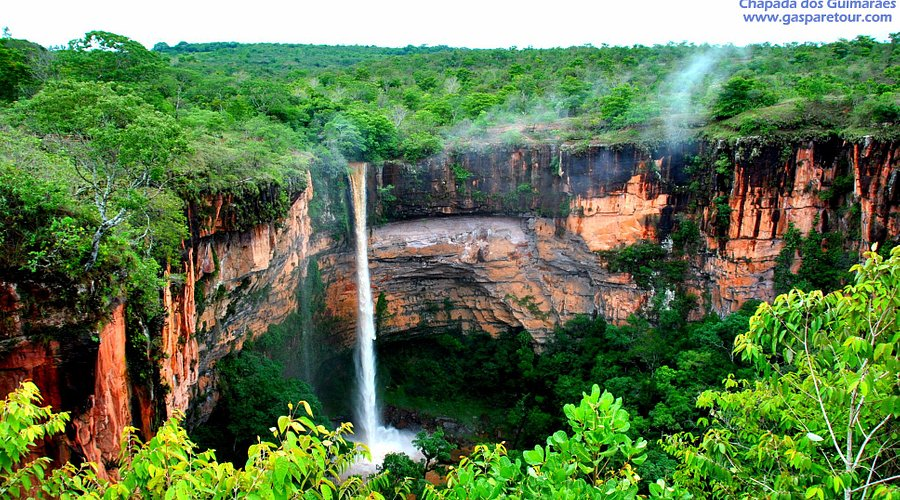

In [ ]:
# Importa a classe `Image` da biblioteca PIL (Python Imaging Library) para manipulação de imagens
from PIL import Image
# Importa o módulo `io` para trabalhar com fluxos de bytes, útil para lidar com dados binários
import io

# Obtém o nome do arquivo a partir dos arquivos carregados
filename = next(iter(uploaded))

# Lê os dados da imagem a partir do arquivo carregado
image_data = uploaded[filename]

# Abre a imagem usando PIL, convertendo os dados binários para um objeto de imagem
uploaded_image = Image.open(io.BytesIO(image_data))

# Exibe a imagem carregada (opcional)
display(uploaded_image)

# Garante que a imagem está no modo RGB (com 3 canais de cor)
#if uploaded_image.mode != "RGB":
#    uploaded_image = uploaded_image.convert("RGB")


Agora é sua vez de testar!!! Crie o seu *prompt*. Basta substituir o texto no *prompt* a seguir, mas lembre-se de que o *prompt* deve ser em inglês.

In [ ]:
# Define a string com o prompt que será enviado para o modelo
# O prompt pede para o modelo explicar a paisagem presente na imagem fornecida
my_prompt = "Explain to me the landscape of this image"


In [ ]:
# Define o prompt ou texto de entrada
# O prompt será formatado com a variável `my_prompt`, que contém a instrução de explicar a paisagem da imagem
prompts = ["USER: <image>\n{}\nASSISTANT:".format(my_prompt)]

# Processa as entradas de imagem e texto
# A função `processor` prepara a imagem e o texto para o modelo, fazendo o padding e retornando os tensores apropriados
# O processamento é feito para rodar no dispositivo "cuda" (GPU)
inputs = processor([uploaded_image], text=prompts, padding=True, return_tensors="pt").to("cuda")

# Gera a resposta do modelo com base nas entradas
# O parâmetro `max_new_tokens=20` limita o número de tokens gerados pelo modelo
output = model.generate(**inputs, max_new_tokens=20)

# Decodifica a resposta gerada pelo modelo e remove tokens especiais (como tokens de início e fim de sequência)
generated_text = processor.batch_decode(output, skip_special_tokens=True)

# Exibe a resposta gerada
# Para cada texto gerado, o código divide pela string "ASSISTANT:" e imprime o que vem depois dessa parte
for text in generated_text:
  print(text.split("ASSISTANT:")[-1])  # Exibe apenas a resposta do assistente, ignorando a parte "ASSISTANT:"


 The image features a beautiful landscape with a large waterfall cascading down a steep cliff


# Referencias

- https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/LLaVa/Inference_with_LLaVa_for_multimodal_generation.ipynb#scrollTo=Xwf9cRoVqO1X
